In [1146]:
import pandas as pd
import numpy as np
from sklearn import datasets

# Proyecto Análisis de Datos peliculas
Lo primero cargaremos los datasets:

# Resumen del Análisis

En este análisis se ha investigado una base de datos de películas con el objetivo de explorar las relaciones entre diversas variables, como la **recaudación en taquilla**, la **duración de las películas**, las **calificaciones** en IMDb y **Metacritic**, y las **categorías** y **géneros** de las películas. 

A lo largo del análisis, se realizaron varias exploraciones y transformaciones de los datos, incluyendo:

1. **Análisis de la recaudación en taquilla**: Se exploró la relación de la recaudación con variables como la duración y las calificaciones de IMDb y Metacritic, encontrando que la recaudación no está fuertemente correlacionada con estos factores. La conclusión sugiere que factores como el marketing, el actor principal, el género, o el contexto cultural podrían ser más influyentes en el éxito financiero de una película.

2. **Estudio de la duración de las películas**: Se analizó si las películas más largas tienen mejores calificaciones, encontrando una correlación moderada con IMDb, pero sin una relación fuerte. Esto indica que la duración por sí sola no garantiza una mayor calidad.

3. **Comparación entre IMDb y Metacritic**: Se observó que existe una correlación moderada entre ambas plataformas de calificación, pero que sus puntuaciones no son idénticas. Esto podría reflejar la diferencia en las evaluaciones de público y críticos profesionales.

4. **Impacto de los géneros**: Se exploró cómo los géneros más comunes en el cine (como Drama y Crime) están distribuidos en las películas, encontrando que estos géneros son muy frecuentes, aunque no parece haber una relación directa con la recaudación o duración de las películas.

5. **Recaudación por década**: Se estudió cómo ha cambiado la recaudación promedio por década, observando un crecimiento general. Sin embargo, la correlación débil con el año de estreno sugiere que otros factores fuera del año de lanzamiento son más determinantes para el éxito comercial.

6. **Conclusión general**: El análisis concluye que, si bien factores como las calificaciones y la duración tienen alguna influencia, la recaudación en taquilla parece depender de una combinación de factores más complejos, como el marketing, la industria cinematográfica y las modas del momento, que juegan un papel más determinante en el éxito comercial de una película.

Este análisis proporciona una visión general sobre cómo diferentes factores interactúan en la industria cinematográfica, sin llegar a una conclusión simple o directa sobre cuál es el único factor determinante en el éxito de una película

In [1147]:
imdb_top_1000 = pd.read_csv('imdb_top_1000.csv')
movies_data = pd.read_csv('movies_data.csv')

Vemos que tenemos 16 columnas y cuales son las columnas con valores nulos. Con el info vemos que las columnas Certificate, Meta_score y Gross tiene datos nulos.
Los tipos de datos son en la mayoria de tipo objeto, aunque tambien tenemos enteros y flotantes.

In [1148]:
imdb_top_1000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


Para este caso tenemos 16 columnas tambien y vemos que las columnas con valores nulos es Certificate,Subgenre, Subgenre 1, Meta_score y Gross

In [1149]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   object 
 2   Certificate    899 non-null    object 
 3   Runtime        1000 non-null   int64  
 4   Genre          1000 non-null   object 
 5   Subgenre       895 non-null    object 
 6   Subgenre 1     646 non-null    object 
 7   IMDB_Rating    1000 non-null   float64
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    float64
dtypes: float64(3), int64(2), object(11)
memory usage: 125.1+ KB


### Descripción de las columnas en el DataFrame

1. **Poster_Link**
   - **Descripción**: Enlace a la imagen del póster de la película.
   - **Tipo de dato**: `string` (cadena de texto)

2. **Series_Title**
   - **Descripción**: Título de la película o serie.
   - **Tipo de dato**: `string` (cadena de texto)

3. **Released_Year**
   - **Descripción**: Año en que se estrenó la película o serie.
   - **Tipo de dato**: `int` (entero)

4. **Certificate**
   - **Descripción**: Clasificación o certificado de edad (por ejemplo, "A" para adultos, "U" para todos los públicos).
   - **Tipo de dato**: `string` (cadena de texto)

5. **Runtime**
   - **Descripción**: Duración de la película o serie en minutos.
   - **Tipo de dato**: `string` (cadena de texto), aunque podría necesitar ser convertido a un valor numérico si se requiere análisis.

6. **Genre**
   - **Descripción**: Género(s) de la película o serie (por ejemplo, "Drama", "Acción", "Comedia").
   - **Tipo de dato**: `string` (cadena de texto)

7. **IMDB_Rating**
   - **Descripción**: Puntuación de la película o serie en IMDb.
   - **Tipo de dato**: `float` (número decimal)

8. **Overview**
   - **Descripción**: Breve resumen o descripción de la película o serie.
   - **Tipo de dato**: `string` (cadena de texto)

9. **Meta_score**
   - **Descripción**: Puntuación de los críticos en Metacritic.
   - **Tipo de dato**: `float` (número decimal), podría ser `NaN` (valor nulo) en algunos casos si no está disponible.

10. **Director**
    - **Descripción**: Director(es) de la película o serie.
    - **Tipo de dato**: `string` (cadena de texto)

11. **Star1, Star2, Star3, Star4**
    - **Descripción**: Los nombres de los actores principales que participaron en la película o serie.
    - **Tipo de dato**: `string` (cadena de texto)

12. **No_of_Votes**
    - **Descripción**: Número de votos recibidos en IMDb por la película o serie.
    - **Tipo de dato**: `int` (entero)

13. **Gross**
    - **Descripción**: Recaudación total de la película en taquilla (en dólares).
    - **Tipo de dato**: `float` (número decimal)


In [1150]:
imdb_top_1000.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


### Descripción de las columnas en el nuevo DataFrame

1. **Series_Title**
   - **Descripción**: Título de la película o serie.
   - **Tipo de dato**: `string` (cadena de texto)

2. **Released_Year**
   - **Descripción**: Año en que se estrenó la película o serie.
   - **Tipo de dato**: `int` (entero)

3. **Certificate**
   - **Descripción**: Clasificación o certificado de edad (por ejemplo, "A" para adultos, "U" para todos los públicos).
   - **Tipo de dato**: `string` (cadena de texto)

4. **Runtime**
   - **Descripción**: Duración de la película o serie en minutos.
   - **Tipo de dato**: `int` (entero)

5. **Genre**
   - **Descripción**: Género principal de la película o serie (por ejemplo, "Drama", "Acción", "Comedia").
   - **Tipo de dato**: `string` (cadena de texto)

6. **Subgenre**
   - **Descripción**: Subgénero de la película o serie, si aplica (por ejemplo, "Suspenso", "Romántico").
   - **Tipo de dato**: `string` (cadena de texto), aunque puede ser `NaN` si no está disponible.

7. **Subgenre 1**
   - **Descripción**: Un segundo subgénero de la película o serie, si aplica.
   - **Tipo de dato**: `string` (cadena de texto), aunque puede ser `NaN` si no está disponible.

8. **IMDB_Rating**
   - **Descripción**: Puntuación de la película o serie en IMDb.
   - **Tipo de dato**: `float` (número decimal)

9. **Meta_score**
   - **Descripción**: Puntuación de los críticos en Metacritic.
   - **Tipo de dato**: `float` (número decimal), podría ser `NaN` si no está disponible.

10. **Director**
    - **Descripción**: Director(es) de la película o serie.
    - **Tipo de dato**: `string` (cadena de texto)

11. **Star1, Star2, Star3, Star4**
    - **Descripción**: Los nombres de los actores principales que participaron en la película o serie.
    - **Tipo de dato**: `string` (cadena de texto)

12. **No_of_Votes**
    - **Descripción**: Número de votos recibidos en IMDb por la película o serie.
    - **Tipo de dato**: `int` (entero)

13. **Gross**
    - **Descripción**: Recaudación total de la película en taquilla (en dólares).
    - **Tipo de dato**: `float` (número decimal)


In [1151]:
movies_data

,Series_Title,Released_Year,Certificate,Runtime,Genre,Subgenre,Subgenre 1,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142,Drama,NaN,NaN,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,The Godfather,1972,A,175,Crime,Drama,NaN,9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,The Dark Knight,2008,UA,152,Action,Crime,Drama,9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,The Godfather: Part II,1974,A,202,Crime,Drama,NaN,9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,12 Angry Men,1957,U,96,Crime,Drama,NaN,9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,A,115,Comedy,Drama,Romance,7.6,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,Giant,1956,G,201,Drama,Western,NaN,7.6,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,From Here to Eternity,1953,Passed,118,Drama,Romance,War,7.6,85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000.0
998,Lifeboat,1944,NaN,97,Drama,War,NaN,7.6,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


- **Valores únicos**:
  - Gran diversidad de géneros (140) y directores (548).
  - 1000 títulos únicos, aunque "Drishyam" se repite 2 veces.
- **Películas más frecuentes**:
  - El género más común es "Drama".
  - El director más frecuente es Alfred Hitchcock.
  - El certificado más común es "U" (para todos los públicos).
- **Promedio**:
  - La **puntuación en IMDb** tiene un promedio de 7.95.
  - La **puntuación en Metacritic** tiene un promedio de 77.97.
  - El **número promedio de votos** es 273,693.
  - La **recaudación promedio** es de 83 millones de dólares.
- **Desviación estándar**:
  - Las puntuaciones de **IMDb** son bastante consistentes.
  - Las **recaudaciones** tienen una gran variabilidad.

In [1152]:
imdb_top_1000.describe(include='all')

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
count,1000,1000,1000,899,1000,1000,1000.000000,1000,843.000000,1000,1000,1000,1000,1000,1.000000e+03,831
unique,1000,999,100,16,140,202,NaN,1000,NaN,548,660,841,891,939,NaN,823
top,https://m.media-amazon.com/images/M/MV5BMDFkYT...,Drishyam,2014,U,100 min,Drama,NaN,Two imprisoned men bond over a number of years...,NaN,Alfred Hitchcock,Tom Hanks,Emma Watson,Rupert Grint,Michael Caine,NaN,"4,360,000"
freq,1,2,32,234,23,85,NaN,1,NaN,14,12,7,5,4,NaN,5
mean,NaN,NaN,NaN,NaN,NaN,NaN,7.949300,NaN,77.971530,NaN,NaN,NaN,NaN,NaN,2.736929e+05,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,0.275491,NaN,12.376099,NaN,NaN,NaN,NaN,NaN,3.273727e+05,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,7.600000,NaN,28.000000,NaN,NaN,NaN,NaN,NaN,2.508800e+04,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,7.700000,NaN,70.000000,NaN,NaN,NaN,NaN,NaN,5.552625e+04,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,7.900000,NaN,79.000000,NaN,NaN,NaN,NaN,NaN,1.385485e+05,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,8.100000,NaN,87.000000,NaN,NaN,NaN,NaN,NaN,3.741612e+05,NaN


- **Valores únicos**:
  - 999 títulos únicos, con "Drishyam" repitiéndose 2 veces.
  - 16 valores únicos para el **Certificate** (clasificación).
  - 14 géneros principales y 20 subgéneros, mostrando una diversidad moderada.
- **Películas más frecuentes**:
  - **Género más común**: "Drama", con 289 apariciones.
  - **Subgénero más común**: "Drama", con 320 apariciones.
  - **Director más frecuente**: Alfred Hitchcock, con 14 películas dirigidas.
  - **Actor más frecuente**: Tom Hanks, con 12 apariciones.
- **Promedio**:
  - La **puntuación en IMDb** tiene un promedio de 7.95.
  - La **puntuación en Metacritic** tiene un promedio de 77.97.
  - El **número promedio de votos** es 273,693.
  - La **recaudación promedio** es de 68.03 millones de dólares.
- **Desviación estándar**:
  - Las puntuaciones de **IMDb** son consistentes con una desviación estándar de 0.28.
  - Las **recaudaciones** tienen una gran variabilidad, con una desviación estándar de 109.75 millones de dólares.

In [1153]:
movies_data.describe(include='all')

,Series_Title,Released_Year,Certificate,Runtime,Genre,Subgenre,Subgenre 1,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
count,1000,1000,899,1000.000000,1000,895,646,1000.000000,843.000000,1000,1000,1000,1000,1000,1.000000e+03,8.310000e+02
unique,999,100,16,NaN,14,20,19,NaN,NaN,548,660,841,891,939,NaN,NaN
top,Drishyam,2014,U,NaN,Drama,Drama,Drama,NaN,NaN,Alfred Hitchcock,Tom Hanks,Emma Watson,Rupert Grint,Michael Caine,NaN,NaN
freq,2,32,234,NaN,289,320,115,NaN,NaN,14,12,7,5,4,NaN,NaN
mean,NaN,NaN,NaN,122.891000,NaN,NaN,NaN,7.949300,77.971530,NaN,NaN,NaN,NaN,NaN,2.736929e+05,6.803475e+07
std,NaN,NaN,NaN,28.093671,NaN,NaN,NaN,0.275491,12.376099,NaN,NaN,NaN,NaN,NaN,3.273727e+05,1.097500e+08
min,NaN,NaN,NaN,45.000000,NaN,NaN,NaN,7.600000,28.000000,NaN,NaN,NaN,NaN,NaN,2.508800e+04,1.305000e+03
25%,NaN,NaN,NaN,103.000000,NaN,NaN,NaN,7.700000,70.000000,NaN,NaN,NaN,NaN,NaN,5.552625e+04,3.253559e+06
50%,NaN,NaN,NaN,119.000000,NaN,NaN,NaN,7.900000,79.000000,NaN,NaN,NaN,NaN,NaN,1.385485e+05,2.353089e+07
75%,NaN,NaN,NaN,137.000000,NaN,NaN,NaN,8.100000,87.000000,NaN,NaN,NaN,NaN,NaN,3.741612e+05,8.075089e+07


# Análisis de columnas y decisiones para preprocesamiento de datos

## Descripción de las columnas en ambos datasets:

### 1. **`imdb_top_1000`**:

- **`Poster_Link`**: Será eliminada, ya que la portada de la película no es relevante para el análisis que vamos a realizar.
- **`Series_Title`**: Título de la película o serie. Esencial, será la clave principal para combinar los datasets.
- **`Released_Year`**: Año de estreno. Relevante para el análisis de tendencias y evolución de las películas.
- **`Certificate`**: Clasificación por edad. Es relevante para analizar la relación con el rating.
- **`Runtime`**: Duración en minutos. Esencial para el análisis de duración de las películas.
- **`Genre`**: Género de la película. Muy relevante para segmentar el análisis por tipo de contenido.
- **`IMDB_Rating`**: Puntuación de IMDb. Relevante para el análisis de popularidad.
- **`Overview`**: Resumen de la película. No es relevante para nuestro análisis y será eliminada.
- **`Meta_score`**: Calificación de los críticos (Metacritic). Relevante para un análisis comparativo entre la crítica profesional y la opinión del público.
- **`Director`**: Director(es) de la película. No será relevante para nuestro análisis en este caso.
- **`Star1, Star2, Star3, Star4`**: Actores principales. No será relevante para nuestro análisis y se eliminarán.
- **`No_of_Votes`**: Número de votos en IMDb. Relevante para el análisis de la popularidad de las películas.
- **`Gross`**: Recaudación total de la película en taquilla. Crucial para el análisis de éxito comercial.

### 2. **`movies_data`**:

- **`Series_Title`**: Título de la película o serie. Esencial, será la clave principal para combinar los datasets.
- **`Released_Year`**: Ya contemplado en el dataset `imdb_top_1000`.
- **`Certificate`**: Ya contemplado en el dataset `imdb_top_1000`.
- **`Runtime`**: Ya contemplado en el dataset `imdb_top_1000`.
- **`Genre`**: Ya contemplado en el dataset `imdb_top_1000`.
- **`Subgenre`**: Subgénero de la película. Útil para realizar análisis más detallado sobre géneros, aunque puede ser opcional si se busca simplicidad.
- **`Subgenre 1`**: Un segundo subgénero de la película. También relevante si se desea realizar un análisis más detallado sobre el contenido, aunque podría ser redundante si solo se utiliza `Genre` y `Subgenre`.
- **`IMDB_Rating`**: Ya contemplado en el dataset `imdb_top_1000`.
- **`Meta_score`**: Ya contemplado en el dataset `imdb_top_1000`.
- **`Director`**: Ya contemplado en el dataset `imdb_top_1000`.
- **`Star1, Star2, Star3, Star4`**: Ya contemplado en el dataset `imdb_top_1000`.
- **`No_of_Votes`**: Ya contemplado en el dataset `imdb_top_1000`.
- **`Gross`**: Ya contemplado.

# Plan de Preprocesamiento

## 1. Eliminar las columnas no relevantes o repetidas:


In [1154]:
# Eliminar las columnas no relevantes
columns_to_drop = ['Poster_Link', 'Overview', 'Director', 'Star1', 'Star2', 'Star3', 'Star4','Gross','Runtime']
imdb_top_1000.drop(columns=columns_to_drop, inplace=True)

columns_to_drop2 = ['Director','Released_Year','Certificate','Genre','IMDB_Rating','Meta_score', 'Star1', 'Star2', 'Star3', 'Star4','No_of_Votes']
movies_data.drop(columns=columns_to_drop2, inplace=True)



## 2. Tratar los valores nulos:
- **Certificate**: Rellenar los valores nulos con un valor como **"Unknown"**.
- **Gross**: Rellenar valores nulos con **0** o eliminarlos si es necesario.
- **Meta_score**: Rellenar valores nulos con la **media** de los valores o eliminarlos si es apropiado.

In [1155]:
# Rellenar valores nulos
imdb_top_1000['Certificate'].fillna('Unknown', inplace=True)

# Rellenar los valores nulos de 'Gross' con la media de la columna
movies_data['Gross'].fillna(movies_data['Gross'].mean(), inplace=True)

# Rellenar los valores nulos de 'Meta_score' con la media de la columna
imdb_top_1000['Meta_score'].fillna(imdb_top_1000['Meta_score'].mean(), inplace=True)

# Rellenar los valores nulos en 'Genre' con 'Unknown'
imdb_top_1000['Genre'].fillna('Unknown', inplace=True)


movies_data['Subgenre'].fillna('Unknown', inplace=True)
movies_data['Subgenre 1'].fillna('Unknown', inplace=True)




<ipython-input-1155-0f37d53ebb61>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  imdb_top_1000['Certificate'].fillna('Unknown', inplace=True)
<ipython-input-1155-0f37d53ebb61>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

## 3. Convertir columnas a tipos de datos adecuados:
- **Runtime**: Asegurarse de que esté en formato **numérico**.
- **Gross**: Asegurarse de que esté en formato **numérico**.
- **IMDB_Rating**: Asegurarse de que esté en formato **numérico**.
- **Meta_score**: Asegurarse de que esté en formato **numérico**.



In [1156]:
# Convertir las columnas a tipos numéricos adecuados
movies_data['Runtime'] = pd.to_numeric(movies_data['Runtime'], errors='coerce')

# Convertir 'Gross', 'Released_Year	', 'IMDB_Rating' a numéricos

imdb_top_1000['Released_Year'] = pd.to_numeric(imdb_top_1000['Released_Year'], errors='coerce')

imdb_top_1000['IMDB_Rating'] = pd.to_numeric(imdb_top_1000['IMDB_Rating'], errors='coerce')

# Convertir 'Meta_score' a numérico
imdb_top_1000['Meta_score'] = pd.to_numeric(imdb_top_1000['Meta_score'], errors='coerce')




## 4. Combinar los datasets utilizando la columna **Series_Title** para obtener un solo DataFrame con los datos relevantes.
Antes de combinar ambos datasets vamos a ver si  tienen los mismos titulos.


In [1157]:
imdb_titles = imdb_top_1000['Series_Title'].unique()
movies_titles = movies_data['Series_Title'].unique()
# Comparar si los títulos coinciden completamente
common_titles = set(imdb_titles).intersection(movies_titles)
print(f"Total de títulos comunes: {len(common_titles)}")


Total de títulos comunes: 999


In [1158]:
# Combinar ambos datasets en uno solo usando 'Series_Title'
merged_data = pd.merge(imdb_top_1000, movies_data, on='Series_Title', how='inner')

In [1159]:
merged_data.head()

,Series_Title,Released_Year,Certificate,Genre,IMDB_Rating,Meta_score,No_of_Votes,Runtime,Subgenre,Subgenre 1,Gross
0,The Shawshank Redemption,1994.0,A,Drama,9.3,80.0,2343110,142,Unknown,Unknown,28341469.0
1,The Godfather,1972.0,A,"Crime, Drama",9.2,100.0,1620367,175,Drama,Unknown,134966411.0
2,The Dark Knight,2008.0,UA,"Action, Crime, Drama",9.0,84.0,2303232,152,Crime,Drama,534858444.0
3,The Godfather: Part II,1974.0,A,"Crime, Drama",9.0,90.0,1129952,202,Drama,Unknown,57300000.0
4,12 Angry Men,1957.0,U,"Crime, Drama",9.0,96.0,689845,96,Drama,Unknown,4360000.0


# Cambiamos el nombre de las columnas a uno mas descriptivo.

In [1160]:
# Cambiar los nombres de las columnas a nombres más descriptivos
merged_data.rename(columns={
    'Series_Title': 'Titulo_Pelicula',
    'Released_Year': 'Anio_Estreno',
    'Certificate': 'Clasificacion_Edad',
    'Genre': 'Genero_Principal',
    'IMDB_Rating': 'Puntuacion_IMDB',
    'Meta_score': 'Puntuacion_Metacritic',
    'No_of_Votes': 'Votos_IMDB',
    'Runtime': 'Duracion_Pelicula_Minutos',
    'Subgenre': 'Subgenero_Principal',
    'Subgenre 1': 'Subgenero_Secundario',
    'Gross': 'Recaudacion_Taquilla'
}, inplace=True)

# Verificar los cambios
merged_data.head()


,Titulo_Pelicula,Anio_Estreno,Clasificacion_Edad,Genero_Principal,Puntuacion_IMDB,Puntuacion_Metacritic,Votos_IMDB,Duracion_Pelicula_Minutos,Subgenero_Principal,Subgenero_Secundario,Recaudacion_Taquilla
0,The Shawshank Redemption,1994.0,A,Drama,9.3,80.0,2343110,142,Unknown,Unknown,28341469.0
1,The Godfather,1972.0,A,"Crime, Drama",9.2,100.0,1620367,175,Drama,Unknown,134966411.0
2,The Dark Knight,2008.0,UA,"Action, Crime, Drama",9.0,84.0,2303232,152,Crime,Drama,534858444.0
3,The Godfather: Part II,1974.0,A,"Crime, Drama",9.0,90.0,1129952,202,Drama,Unknown,57300000.0
4,12 Angry Men,1957.0,U,"Crime, Drama",9.0,96.0,689845,96,Drama,Unknown,4360000.0


## Análisis de la Calidad de los Datos

1. Valores Nulos (Missing Values)

In [1161]:
# Verificar valores nulos en el DataFrame
missing_values = merged_data.isnull().sum()
missing_percentage = (missing_values / len(merged_data)) * 100
missing_values, missing_percentage


(Titulo_Pelicula              0
 Anio_Estreno                 1
 Clasificacion_Edad           0
 Genero_Principal             0
 Puntuacion_IMDB              0
 Puntuacion_Metacritic        0
 Votos_IMDB                   0
 Duracion_Pelicula_Minutos    0
 Subgenero_Principal          0
 Subgenero_Secundario         0
 Recaudacion_Taquilla         0
 dtype: int64,
 Titulo_Pelicula              0.0000
 Anio_Estreno                 0.0998
 Clasificacion_Edad           0.0000
 Genero_Principal             0.0000
 Puntuacion_IMDB              0.0000
 Puntuacion_Metacritic        0.0000
 Votos_IMDB                   0.0000
 Duracion_Pelicula_Minutos    0.0000
 Subgenero_Principal          0.0000
 Subgenero_Secundario         0.0000
 Recaudacion_Taquilla         0.0000
 dtype: float64)

2. Valores Duplicados

In [1162]:
# Verificar si existen filas duplicadas en el DataFrame
duplicados = merged_data.duplicated().sum()
duplicados


0

3. Valores Atípicos (Outliers)

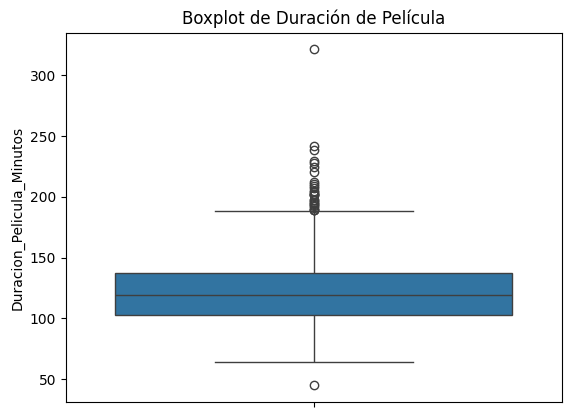

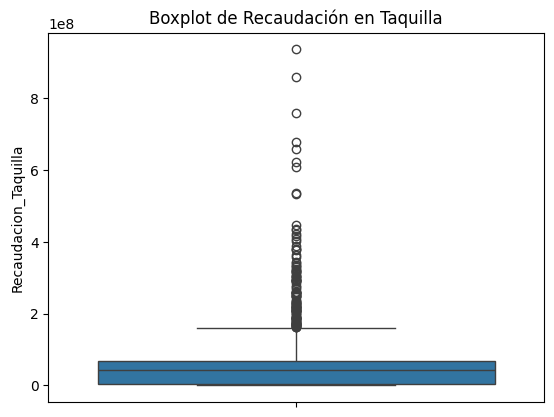

In [1163]:
# Identificar valores atípicos en la duración de las películas
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizar boxplot para Duración de película
sns.boxplot(data=merged_data['Duracion_Pelicula_Minutos'])
plt.title('Boxplot de Duración de Película')
plt.show()

# Visualizar boxplot para Recaudación en Taquilla
sns.boxplot(data=merged_data['Recaudacion_Taquilla'])
plt.title('Boxplot de Recaudación en Taquilla')
plt.show()


4. Consistencia de los Datos
No se ve a simple vista que haya datos inconcistentes, aunque si existen generos repetidos que corregimos posteriormente.

In [1164]:
# Verificar los valores únicos en las columnas 'Clasificacion_Edad' y 'Genero_Principal'
clasificacion_edad_unicos = merged_data['Clasificacion_Edad'].unique()
genero_principal_unicos = merged_data['Genero_Principal'].unique()

clasificacion_edad_unicos, genero_principal_unicos


(array(['A', 'UA', 'U', 'PG-13', 'R', 'Unknown', 'PG', 'G', 'Passed',
        'TV-14', '16', 'TV-MA', 'Unrated', 'GP', 'Approved', 'TV-PG',
        'U/A'], dtype=object),
 array(['Drama', 'Crime, Drama', 'Action, Crime, Drama',
        'Action, Adventure, Drama', 'Biography, Drama, History',
        'Action, Adventure, Sci-Fi', 'Drama, Romance', 'Western',
        'Action, Sci-Fi', 'Biography, Crime, Drama',
        'Action, Adventure, Fantasy', 'Comedy, Drama, Thriller',
        'Adventure, Drama, Sci-Fi', 'Animation, Adventure, Family',
        'Drama, War', 'Crime, Drama, Fantasy', 'Comedy, Drama, Romance',
        'Crime, Drama, Mystery', 'Crime, Drama, Thriller',
        'Action, Drama, Mystery', 'Drama, Family, Fantasy', 'Drama, Music',
        'Biography, Comedy, Drama', 'Drama, Mystery, Sci-Fi',
        'Biography, Drama, Music', 'Crime, Mystery, Thriller',
        'Animation, Adventure, Drama', 'Animation, Drama, War',
        'Adventure, Comedy, Sci-Fi', 'Horror, Mystery, Thr

5. Tipos de Datos

In [1165]:
# Verificar los tipos de datos en el DataFrame
tipos_datos = merged_data.dtypes
tipos_datos


,0
Titulo_Pelicula,object
Anio_Estreno,float64
Clasificacion_Edad,object
Genero_Principal,object
Puntuacion_IMDB,float64
Puntuacion_Metacritic,float64
Votos_IMDB,int64
Duracion_Pelicula_Minutos,int64
Subgenero_Principal,object
Subgenero_Secundario,object


6. Distribución de los Datos

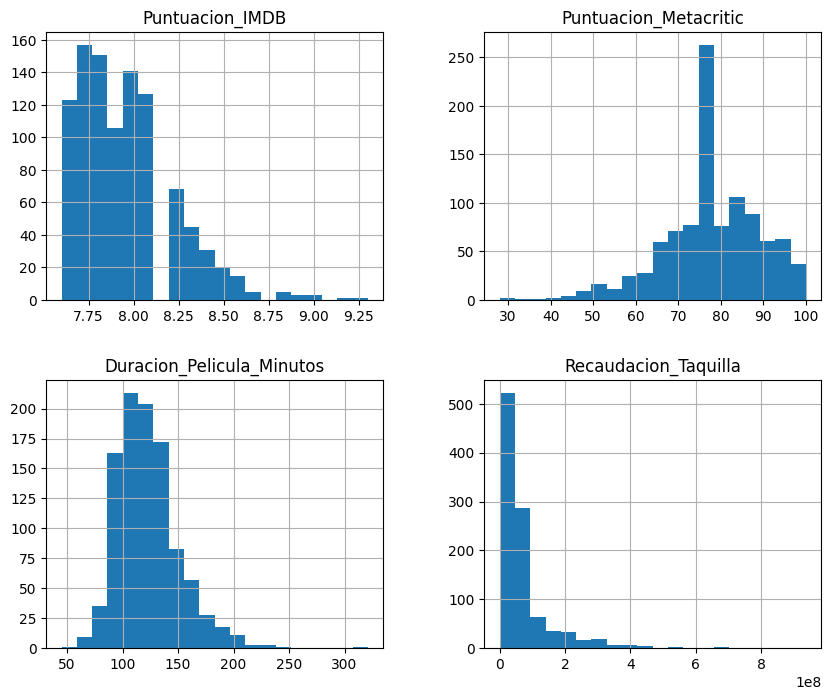

In [1166]:
# Ver distribución de columnas numéricas
merged_data[['Puntuacion_IMDB', 'Puntuacion_Metacritic', 'Duracion_Pelicula_Minutos', 'Recaudacion_Taquilla']].hist(bins=20, figsize=(10, 8))
plt.show()


# Análisis exploratorio:
- Evaluar la **distribución de los géneros** y los **años de estreno**.
- Comparar las **puntuaciones de IMDb** con las de **Metacritic**.
- Estudiar las **relaciones entre la recaudación en taquilla**, la **duración de las películas** y las **calificaciones**.

##  Este gráfico de barras mostrará de forma clara cuántas películas hay de cada género.
Vemos que el género que más se repite en las películas es Drama.

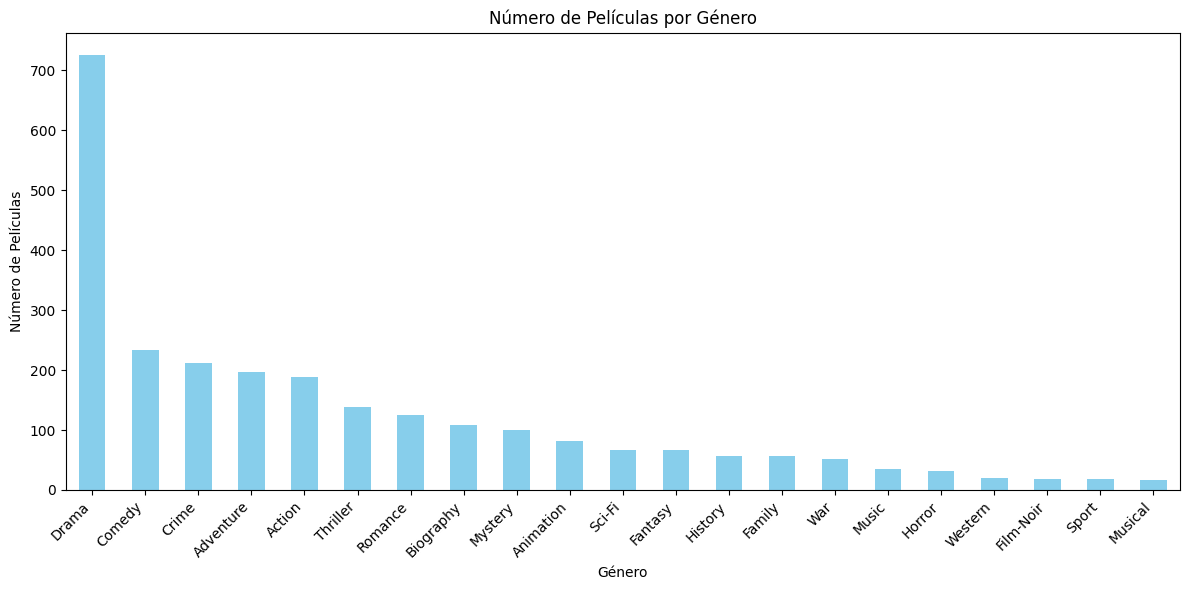

In [1167]:
# Separar y limpiar los géneros
merged_data['Genero_Principal'] = merged_data['Genero_Principal'].str.split(',')

# Limpiar los espacios en los géneros y luego explotar la lista de géneros en filas
merged_data['Genero_Principal'] = merged_data['Genero_Principal'].apply(lambda x: [g.strip() for g in x])

# Explotar los géneros para contar de manera correcta
generos_count = merged_data['Genero_Principal'].explode().value_counts()

# Graficar la distribución de géneros con un gráfico de barras
plt.figure(figsize=(12, 6))
generos_count.plot(kind='bar', color='skyblue')
plt.title('Número de Películas por Género')
plt.xlabel('Género')
plt.ylabel('Número de Películas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Ajusta la gráfica para que no se sobrepongan los textos
plt.show()


## Comparación de puntuaciones de IMDb y Metacritic:
Observando las puntuaciones de las 10 películas más valoradas, vemos que tienen una puntuacion similar aunque la de metacritic parece ser un poco superior en varios casos.

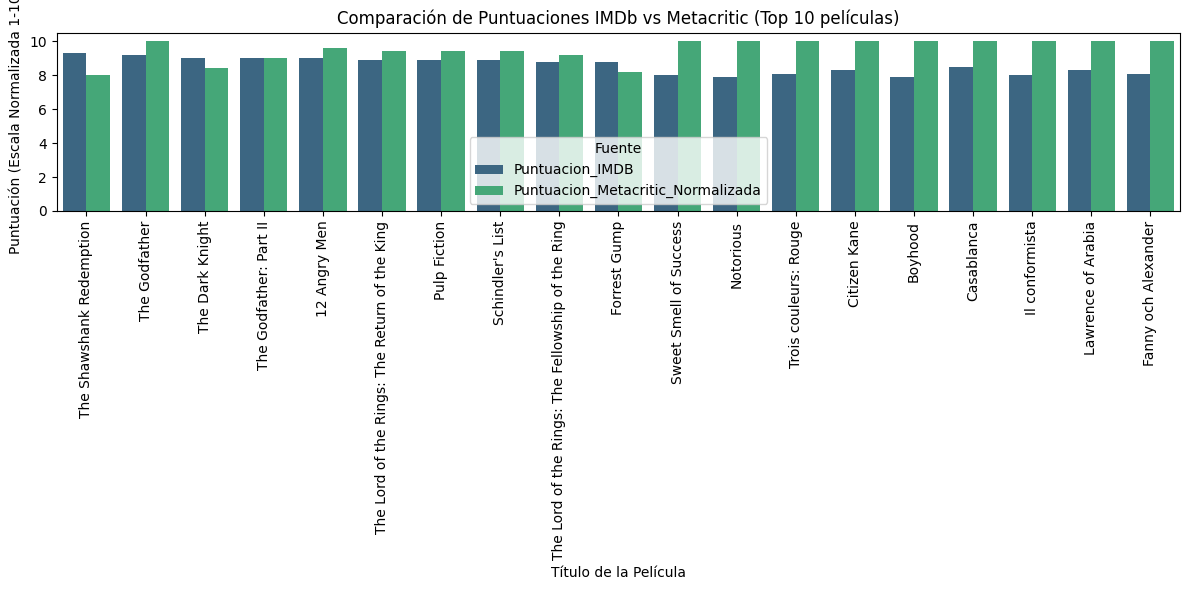

In [1168]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Normalizar las puntuaciones de Metacritic para que estén en el rango de 1-10
merged_data_clean['Puntuacion_Metacritic_Normalizada'] = merged_data_clean['Puntuacion_Metacritic'] / 10

# Ordenar por las mejores puntuaciones de IMDb y Metacritic
top_peliculas_imdb = merged_data_clean[['Titulo_Pelicula', 'Puntuacion_IMDB', 'Puntuacion_Metacritic_Normalizada']].sort_values(by='Puntuacion_IMDB', ascending=False).head(10)
top_peliculas_metacritic = merged_data_clean[['Titulo_Pelicula', 'Puntuacion_IMDB', 'Puntuacion_Metacritic_Normalizada']].sort_values(by='Puntuacion_Metacritic_Normalizada', ascending=False).head(10)

# Combinar ambas listas de películas (las 10 mejores de cada fuente)
top_peliculas_combinadas = pd.concat([top_peliculas_imdb, top_peliculas_metacritic]).drop_duplicates()

# Transformar los datos a formato largo para graficar
top_peliculas_combinadas_melted = top_peliculas_combinadas.melt(id_vars='Titulo_Pelicula',
                                                               value_vars=['Puntuacion_IMDB', 'Puntuacion_Metacritic_Normalizada'],
                                                               var_name='Fuente',
                                                               value_name='Puntuación')

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='Titulo_Pelicula', y='Puntuación', hue='Fuente', data=top_peliculas_combinadas_melted, palette='viridis')

# Personalizar gráfico
plt.title('Comparación de Puntuaciones IMDb vs Metacritic (Top 10 películas)')
plt.xlabel('Título de la Película')
plt.ylabel('Puntuación (Escala Normalizada 1-10)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Viendo el total de las películas, vemos que las peliculas de IMDB paerten desde 7 y las de Metacritic sobre 3. En general las de Metacritic son más variadas, esto podría sugerir que Metacritic es más exigente en su evaluación, pero para películas con una puntuacion más altas, ambas plataformas opinan algo similar.

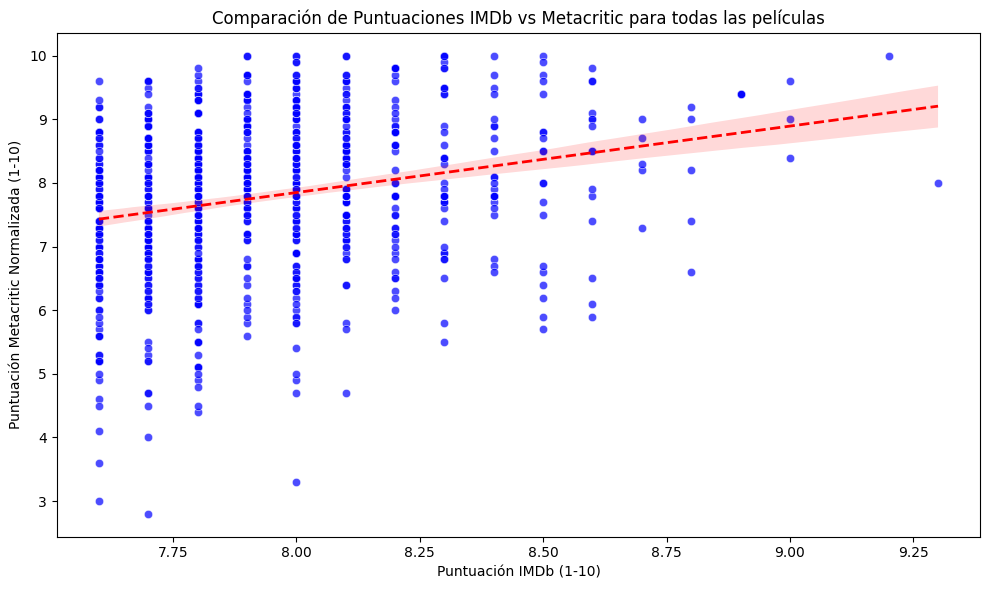

In [1169]:
import seaborn as sns
import matplotlib.pyplot as plt

# Normalizar las puntuaciones de Metacritic para que estén en el rango de 1-10
merged_data_clean['Puntuacion_Metacritic_Normalizada'] = merged_data_clean['Puntuacion_Metacritic'] / 10

# Crear gráfico de dispersión (scatter plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Puntuacion_IMDB', y='Puntuacion_Metacritic_Normalizada', data=merged_data_clean, alpha=0.7, color='blue')

# Agregar línea de tendencia
sns.regplot(x='Puntuacion_IMDB', y='Puntuacion_Metacritic_Normalizada', data=merged_data_clean, scatter=False, color='red', line_kws={"linewidth": 2, 'linestyle': '--'})

# Títulos y etiquetas
plt.title('Comparación de Puntuaciones IMDb vs Metacritic para todas las películas')
plt.xlabel('Puntuación IMDb (1-10)')
plt.ylabel('Puntuación Metacritic Normalizada (1-10)')

# Mejorar la presentación
plt.tight_layout()
plt.show()


Viendo la recaudacion por año, vemos que no existe una relacion clara, pero con el paso de los años, hay peliculas que han llegado a recaudar mucho más que en el pasado.

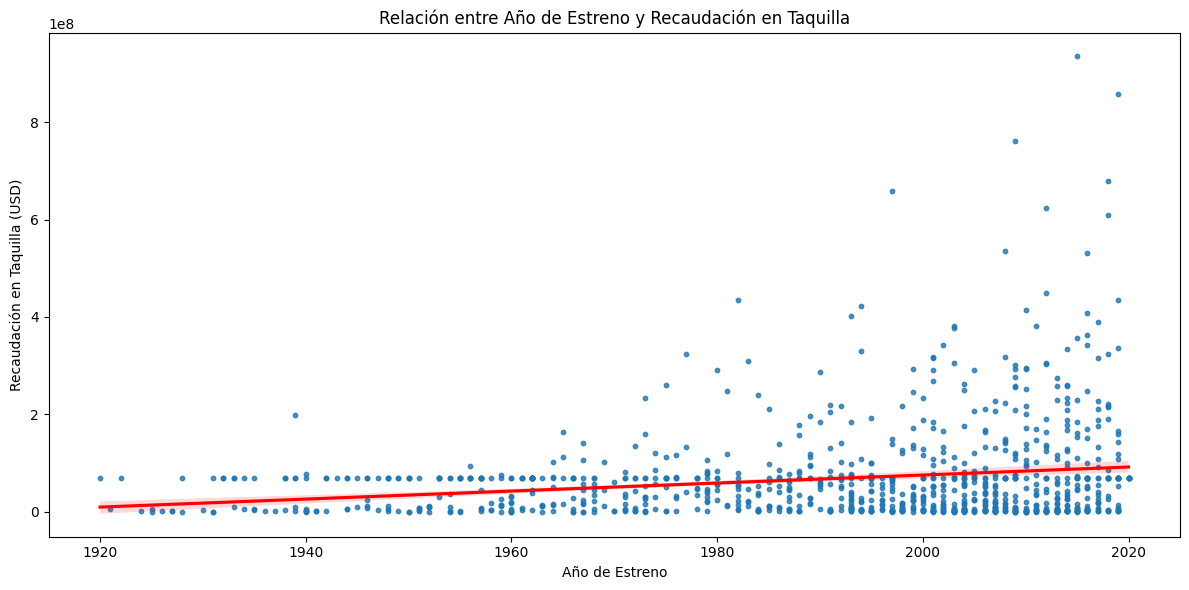

In [1170]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear gráfico de dispersión con línea de tendencia
plt.figure(figsize=(12, 6))
sns.regplot(x='Anio_Estreno', y='Recaudacion_Taquilla', data=merged_data_clean, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Relación entre Año de Estreno y Recaudación en Taquilla')
plt.xlabel('Año de Estreno')
plt.ylabel('Recaudación en Taquilla (USD)')
plt.tight_layout()
plt.show()


Observamos que la recaudacion por decadas es mayor. Por lo que vemos que o hay más personas que han ido al cine o la cantidad de peliculas producidas ha aumentado.

<ipython-input-1171-3c8446380eb5>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  recaudacion_promedio_decada = merged_data.groupby('Decada')['Recaudacion_Taquilla'].mean().reset_index()


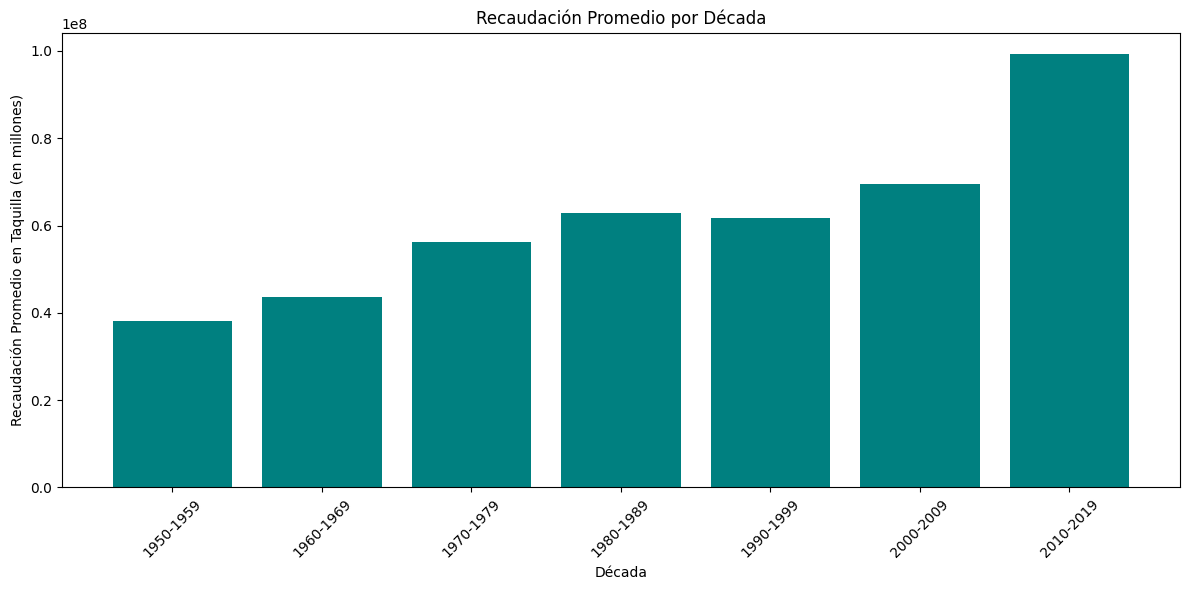

In [1171]:
# Crear intervalos de 10 años (décadas)
bins = range(1950, 2030, 10)  # Ajusta según el rango de tus datos
labels = [f'{i}-{i+9}' for i in range(1950, 2020, 10)]  # Cambiar 2030 por 2020 para que las etiquetas sean una menos

# Asignar las décadas a cada película
merged_data['Decada'] = pd.cut(merged_data['Anio_Estreno'], bins=bins, labels=labels, right=False)

# Agrupar por década y calcular la recaudación promedio
recaudacion_promedio_decada = merged_data.groupby('Decada')['Recaudacion_Taquilla'].mean().reset_index()

# Crear gráfico
plt.figure(figsize=(12, 6))
plt.bar(recaudacion_promedio_decada['Decada'], recaudacion_promedio_decada['Recaudacion_Taquilla'], color='teal')
plt.title('Recaudación Promedio por Década')
plt.xlabel('Década')
plt.ylabel('Recaudación Promedio en Taquilla (en millones)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Vemos que la cantidad de peliculas por decada ha aumentado decada tras decada.


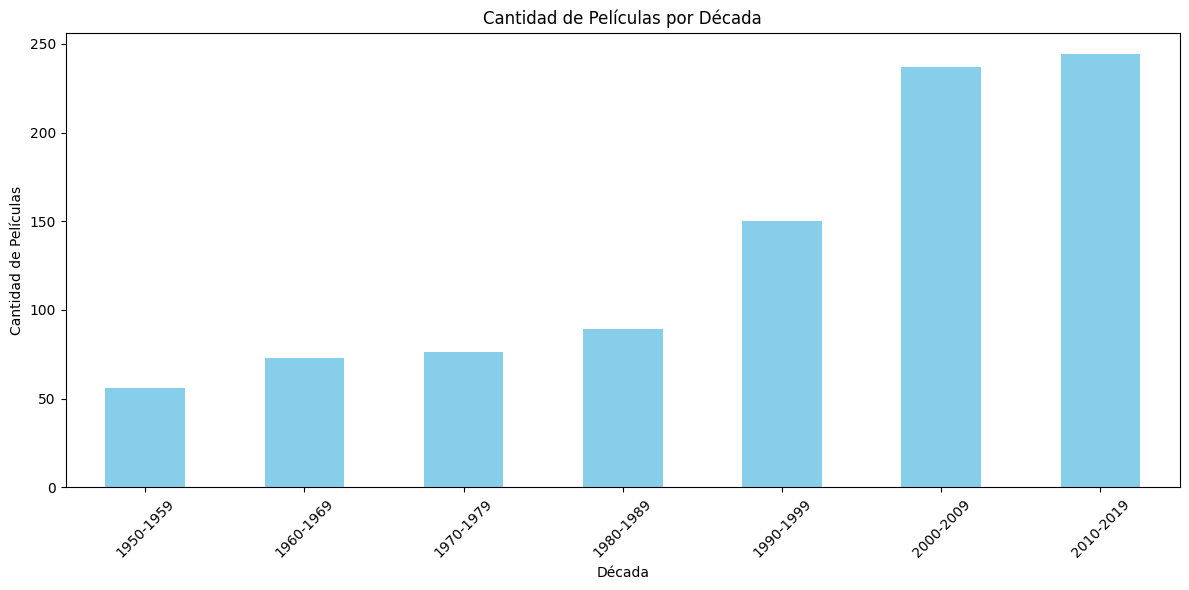

In [1172]:
# Asignar las décadas a cada película (nuevamente si es necesario)
bins = list(range(1950, 2021, 10))  # Establecemos intervalos de 10 años
labels = [f'{x}s' for x in range(1950, 2021, 10)]  # Etiquetas para las décadas

# Contar la cantidad de películas por década
peliculas_por_decada = merged_data['Decada'].value_counts().sort_index()

# Graficar la cantidad de películas por década
plt.figure(figsize=(12, 6))
peliculas_por_decada.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Películas por Década')
plt.xlabel('Década')
plt.ylabel('Cantidad de Películas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Vemos que la cantidad de valoraciones decada a decada ha ido en aumento. Por lo que ha aumentado tanto la cantidad de personas que han ido a ver peliculas, como la cantidad de peliculas que han sido producidas. LLevando a ello a una mayor recaudacion.

<ipython-input-1175-0362033217f7>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  votos_por_decada = merged_data.groupby('Decada')['Votos_IMDB'].sum()


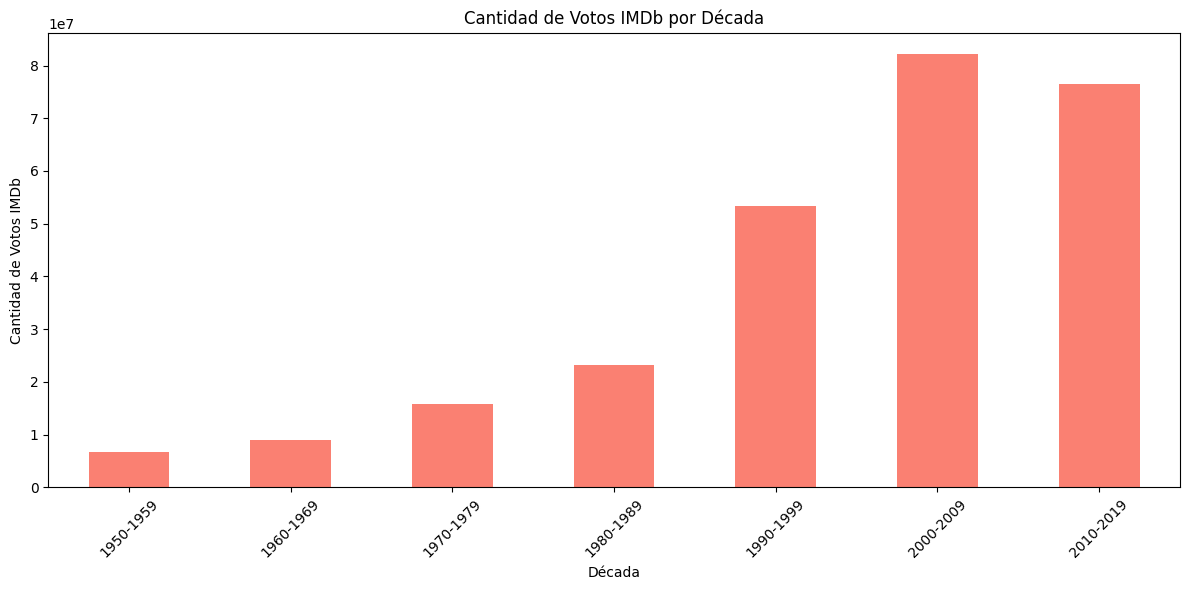

In [1175]:
# Agrupar por década y sumar la cantidad de votos por película
votos_por_decada = merged_data.groupby('Decada')['Votos_IMDB'].sum()

# Graficar la cantidad de votos por década
plt.figure(figsize=(12, 6))
votos_por_decada.plot(kind='bar', color='salmon')
plt.title('Cantidad de Votos IMDb por Década')
plt.xlabel('Década')
plt.ylabel('Cantidad de Votos IMDb')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


La correlación de 0.19 entre el año de estreno y la recaudación en taquilla sugiere que hay una relación muy débil y positiva entre estas dos variables. Esto significa que, en general, el año de estreno tiene una influencia muy pequeña en la recaudación de taquilla.

In [1173]:
# Calcular la correlación entre el año de estreno y la recaudación
correlacion = merged_data_clean['Anio_Estreno'].corr(merged_data_clean['Recaudacion_Taquilla'])
print(f'La correlación entre el año de estreno y la recaudación en taquilla es: {correlacion}')


La correlación entre el año de estreno y la recaudación en taquilla es: 0.19199637579389928


# Por ultimo vamos a estudiar las **relaciones entre la recaudación en taquilla**, la **duración de las películas** y las **calificaciones**.

##Relación entre recaudación y las variables:

La recaudación en taquilla muestra una relación **débil** tanto con la duración de las películas como con las calificaciones en IMDb y Metacritic. Esto sugiere que la duración o las calificaciones por sí solas no son factores determinantes del éxito en taquilla.

##Duración y calificaciones:

La duración de la película tiene una correlación **débil** y positiva con IMDb pero no muestra una relación clara con Metacritic. Esto podría significar que las películas más largas tienden ligeramente a tener mejores calificaciones en IMDb, pero la relación es **débil**.

##Calificaciones en IMDb y Metacritic:

La correlación positiva entre IMDb y Metacritic (0.254) sugiere que las películas que son bien valoradas en una de estas plataformas tienden a ser bien valoradas en la otra, aunque la relación es **débil**.

In [1176]:
# Correlación entre recaudación, duración y calificaciones
correlaciones = merged_data[['Recaudacion_Taquilla', 'Duracion_Pelicula_Minutos', 'Puntuacion_IMDB', 'Puntuacion_Metacritic']].corr()

# Mostrar la matriz de correlación
print(correlaciones)


                           Recaudacion_Taquilla  Duracion_Pelicula_Minutos  \
Recaudacion_Taquilla                   1.000000                   0.123406   
Duracion_Pelicula_Minutos              0.123406                   1.000000   
Puntuacion_IMDB                        0.088897                   0.245349   
Puntuacion_Metacritic                 -0.030898                  -0.027742   

                           Puntuacion_IMDB  Puntuacion_Metacritic  
Recaudacion_Taquilla              0.088897              -0.030898  
Duracion_Pelicula_Minutos         0.245349              -0.027742  
Puntuacion_IMDB                   1.000000               0.253593  
Puntuacion_Metacritic             0.253593               1.000000  


No se ve una relacion entre las peliculas y la duracion de la misma

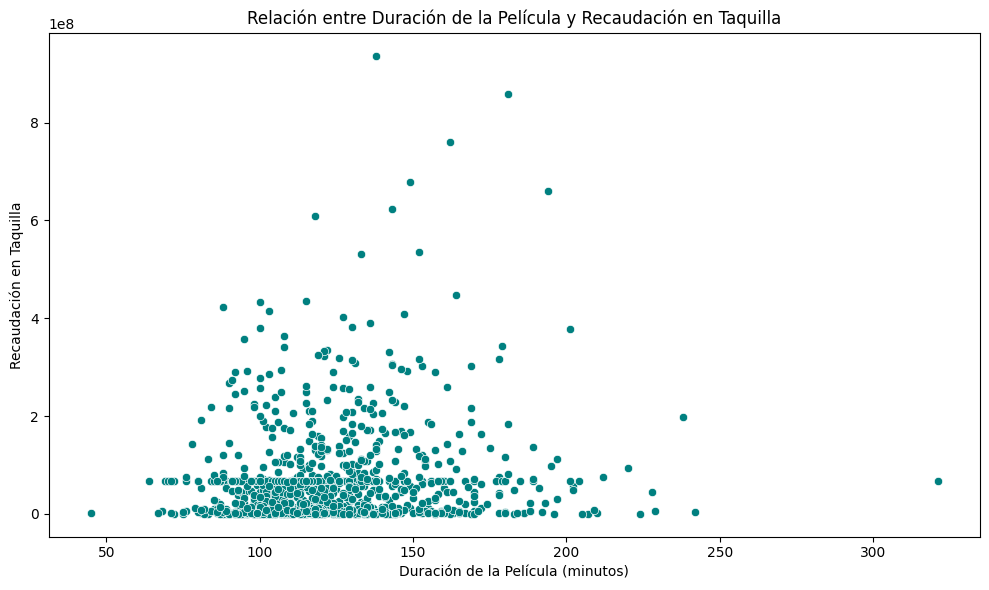

In [1177]:
# Scatter plot de recaudación vs duración
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duracion_Pelicula_Minutos', y='Recaudacion_Taquilla', data=merged_data, color='teal')
plt.title('Relación entre Duración de la Película y Recaudación en Taquilla')
plt.xlabel('Duración de la Película (minutos)')
plt.ylabel('Recaudación en Taquilla')
plt.tight_layout()
plt.show()


Tampoco se ve una relacion entre la puntuaciones y las recaudaciones.

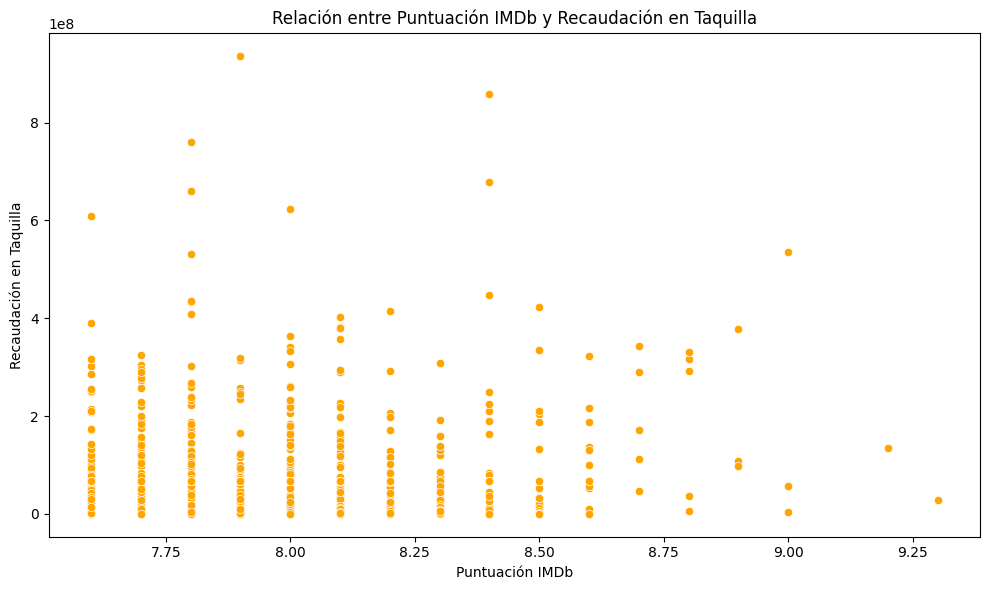

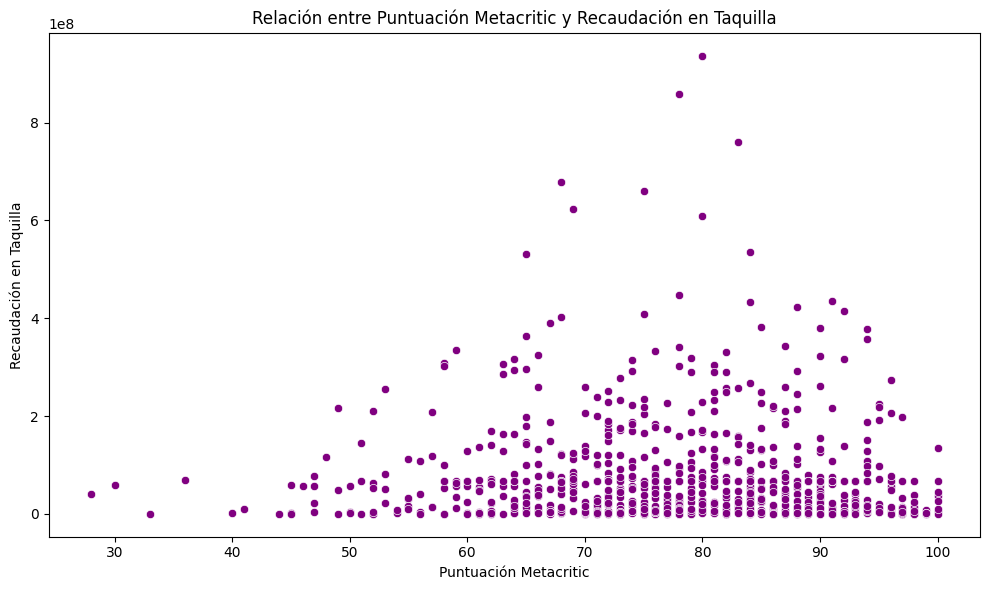

In [1178]:
# Scatter plot de recaudación vs Puntuación IMDb
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Puntuacion_IMDB', y='Recaudacion_Taquilla', data=merged_data, color='orange')
plt.title('Relación entre Puntuación IMDb y Recaudación en Taquilla')
plt.xlabel('Puntuación IMDb')
plt.ylabel('Recaudación en Taquilla')
plt.tight_layout()
plt.show()

# Scatter plot de recaudación vs Puntuación Metacritic
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Puntuacion_Metacritic', y='Recaudacion_Taquilla', data=merged_data, color='purple')
plt.title('Relación entre Puntuación Metacritic y Recaudación en Taquilla')
plt.xlabel('Puntuación Metacritic')
plt.ylabel('Recaudación en Taquilla')
plt.tight_layout()
plt.show()


# Conclusiones del Análisis

1. **Recaudación en taquilla y su relación con otras variables**:
   - La **recaudación en taquilla** tiene una correlación **débil** con la **duración de la película** y las **calificaciones** en IMDb y Metacritic. Esto sugiere que la duración de la película y las calificaciones no son los factores principales que determinan cuánto dinero genera una película en taquilla.
   - En términos generales, las películas que generan más dinero en taquilla no necesariamente son las más largas ni las mejor calificadas, lo que indica que otros factores (como el marketing, el actor principal, el género o el contexto socio-cultural) pueden ser más influyentes en el éxito financiero.

2. **Duración de la película**:
   - Aunque la **duración de la película** muestra una **correlación moderada** con la **puntuación de IMDb** (0.245), lo que sugiere que las películas más largas suelen tener mejores puntuaciones en IMDb, no hay una relación fuerte. Esto puede ser debido a que la duración por sí sola no garantiza la calidad de la película.
   - La **duración** tiene una **correlación muy débil** con **Metacritic**, lo que indica que los críticos no parecen valorar la duración como un factor importante al calificar una película.

3. **Puntuaciones de IMDb vs. Puntuaciones de Metacritic**:
   - **IMDb** y **Metacritic** están **moderadamente correlacionados** (0.253), lo que significa que las películas bien calificadas en uno de los dos sistemas suelen ser bien calificadas en el otro. Sin embargo, las puntuaciones no son idénticas, lo que sugiere que estos dos sistemas de calificación tienen diferencias en cómo evalúan una película.
   - La diferencia en la naturaleza de estas plataformas (IMDb basado en la votación del público y Metacritic basado en la crítica profesional) podría explicar por qué algunas películas tienen puntuaciones muy diferentes en ambos sistemas.

4. **Impacto de los géneros**:
   - Los **géneros más comunes** en el análisis son **Drama** y **Crime**, lo que podría indicar que estas categorías tienden a ser más populares en el cine global.
   - Los **géneros** no parecen tener una relación clara con la recaudación o la duración de las películas, aunque esto dependerá también del contexto del mercado cinematográfico, como las tendencias de la industria.

5. **Recaudación por década**:
   - Al analizar la **recaudación promedio por década**, se observa que, en general, la recaudación ha aumentado con el tiempo. Esto podría estar relacionado con factores como la inflación, la globalización del cine, el aumento de la audiencia global y el uso de nuevas tecnologías en la producción de películas.
   - Sin embargo, a pesar del crecimiento general de la recaudación, la **correlación débil** entre el **año de estreno** y la **recaudación** sugiere que otros factores fuera del año de lanzamiento son los más determinantes para el éxito comercial de una película.

6. **Conclusión general**:
   - Las **calificaciones de películas**, ya sea en IMDb o Metacritic, no tienen una fuerte relación con la **recaudación en taquilla**, lo que implica que los gustos del público o la crítica no son siempre el principal factor determinante en el éxito comercial de una película.
   - Aunque la **duración** tiene una ligera correlación con las calificaciones de IMDb, no parece tener un impacto significativo en el éxito de la película en términos financieros.
   - La **industria cinematográfica** está influenciada por múltiples factores, como los actores, la promoción, la narrativa, el marketing, y las modas, los cuales probablemente jueguen un papel más determinante en la recaudación que las variables que hemos analizado.
